# Regresión lineal: Costo de un incidente de seguridad

En este ejercicio se explican los fundamentos de la regresion lineal aplicada a un caso sencillo relacionado con la CyberSeguridad.

#### Enunciado del Ejercicio

El ejercicio consiste en predecir el costo de un insidente de seguridad en base al numero de equipos afectados. El conjunto d edatos es 
generado de manera aleatoria

## 1.- Generacion del DataSet

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("La longitud del DataSet es: ", len(X))

La longitud del DataSet es:  100


## 2.- Visualizacion del DataSet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

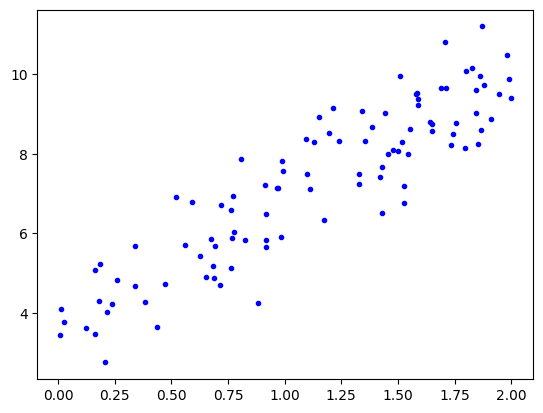

In [3]:
plt.plot(X, y, "b.")
plt.show()


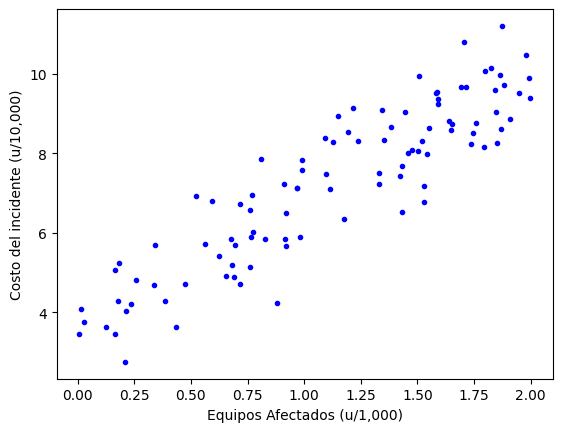

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos Afectados (u/1,000)")
plt.ylabel("Costo del incidente (u/10,000)")
plt.show()

# 3._Modificacion del DataSet

In [5]:
import pandas as pd

data = {'No_Equipos_Afectados': X.flatten(), 'Costo': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,0.771702,6.948524
1,0.472496,4.718597
2,0.027174,3.763945
3,1.800077,10.077801
4,1.990903,9.891297
5,0.435282,3.640512
6,1.641113,8.802297
7,1.195231,8.530242
8,1.352793,8.327153
9,1.581293,9.509868


In [6]:
# Escalando el numero de equipos afectados
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df[ 'No_Equipos_Afectados'] = df[ 'No_Equipos_Afectados'].astype(int)
# Escalado del costo
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype(int)
df.head(10)


,No_Equipos_Afectados,Costo
0,771,69485
1,472,47185
2,27,37639
3,1800,100778
4,1990,98912
5,435,36405
6,1641,88022
7,1195,85302
8,1352,83271
9,1581,95098


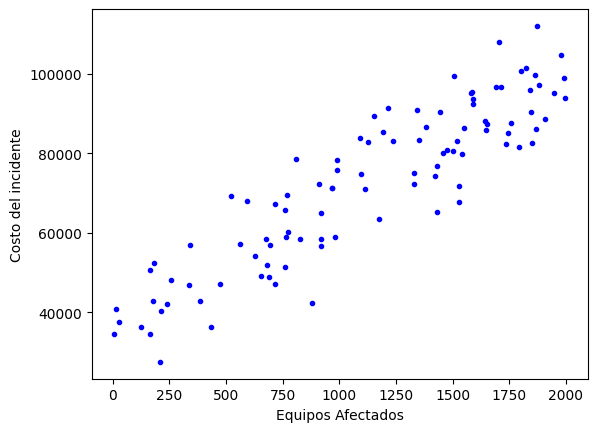

In [7]:
# Representacion grafica del DataSetplt.plot
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show()

## 4.- Construccion del modelo

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
# Construccion del modelo y ajuste de la funcion de hipotesis
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1, 1), df['Costo'].values)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# Parametro theta 0
lin_reg.intercept_

np.float64(36701.985577118925)

In [11]:
# Parametro Theta 1
lin_reg.coef_

array([31.76151298])

In [12]:
# Prediccion para el valor minimo y maximo del DataSet de entrenamiento
x_min_max = np.array([[df["No_Equipos_Afectados"].min()], [df["No_Equipos_Afectados"].max()]])
y_train_pred = lin_reg.predict(x_min_max)

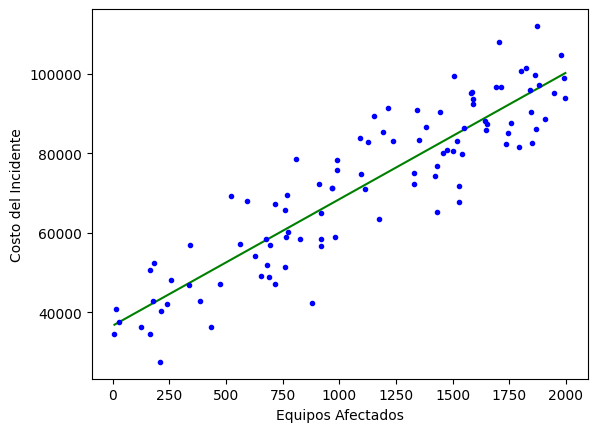

In [13]:
# Representacion grafica de la funcion de Hipotesis  generada
plt.plot(x_min_max, y_train_pred, "g-")
plt.plot(df["No_Equipos_Afectados"], df["Costo"], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()

## 5-- Prediccion de nuevos ejemplos


In [14]:
x_new = np.array([[3000]]) #1500 equipos afectados

# Predicion del costo que tendria el incidente
Costo = lin_reg.predict(x_new)

print("El costo del incidente seria $ ", int(Costo[0]))

El costo del incidente seria $  131986


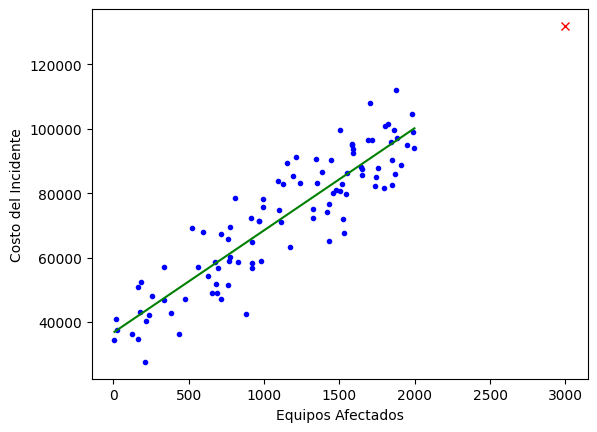

In [15]:
plt.plot(df["No_Equipos_Afectados"], df["Costo"], "b.")
plt.plot(x_min_max, y_train_pred, "g-")
plt.plot(x_new, Costo,"rx")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()